# 1. Imports

In [1]:
import os
import glob
from datetime import timedelta, date

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

# 2. Functions

In [2]:
def get_cabase_members_by_ixp(file_name, ixp_df, central_node_asn,
                              feeder_as):
    """
    This.

    Bla bla.
    """
    # opens data of that date
    df = pd.read_csv(file_name, header='infer', sep=',')
    output_list = []
    for index, row in ixp_df.iterrows():
        ixp_asn = row['asn']
        members_set = set()
        # if it is a local IXP seen from feeder AS IXP
        if ixp_asn != feeder_as:
            # paths that corresponds to `ixp` are those who have this chain
            # 1) AS11058 CABASE-BUE where PCH monitor is
            # 2) AS52376 CABASE-RCN CABASE's central node where
            # each regional IXP is connected to
            # 3) The ASN of the regional IXP
            paths_array = df.loc[
                df['as-path'].str.startswith(
                    '%s,%s,%s,' % (
                        feeder_as,
                        central_node_asn,
                        ixp_asn
                    )
                )
            ]['as-path'].values
            # The fourth node in the PATH is the one which is the
            # directly connected to the regional IXP
            for path in paths_array:
                member = path.split(',')[3]
                members_set.add(int(member))
        # if we would like to see member at the feeder AS
        else:
            paths_array = df.loc[
                df['as-path'].str.startswith(
                    '%s,' % feeder_as
                )
            ]['as-path'].values
            # The second node in the PATH is the one which is the
            # directly connected to the regional IXP
            for path in paths_array:
                member = path.split(',')[1]
                members_set.add(int(member))
        output_list.append(
            (
                row['iata_code'],
                row['asn'],
                row['city_name'],
                len(members_set)
            )
        )
    return output_list

In [3]:
def get_pit_chile_members_by_ixp(file_name, ixp_df, feeder_as):
    """
    This.

    Bla bla.
    """
    # opens data of that date
    df = pd.read_csv(file_name, header='infer', sep=',')
    output_list = []
    for index, row in ixp_df.iterrows():
        ixp_asn = row['asn']
        members_set = set()
        # if it is a local IXP seen from feeder AS IXP
        if ixp_asn != feeder_as:
            # paths that corresponds to `ixp` are those who have this chain
            # 1) AS61522 PIT Chile-SCL where PCH monitor is
            # each regional IXP is connected to
            # 2) The ASN of the regional IXP
            paths_array = df.loc[
                df['as-path'].str.startswith(
                    '%s,%s,' % (
                        feeder_as,
                        ixp_asn
                    )
                )
            ]['as-path'].values
            # The third node in the PATH is the one which is the
            # directly connected to the regional IXP
            for path in paths_array:
                member = path.split(',')[2]
                members_set.add(int(member))
        # if we would like to see member at the feeder AS
        else:
            paths_array = df.loc[
                df['as-path'].str.startswith(
                    '%s,' % feeder_as
                )
            ]['as-path'].values
            # The second node in the PATH is the one which is the
            # directly connected to the regional IXP
            for path in paths_array:
                member = path.split(',')[1]
                members_set.add(int(member))
        output_list.append(
            (
                row['asn'],
                row['city_name'],
                len(members_set)
            )
        )
    return output_list

In [4]:
def get_ixbr_members_by_ixp(file_name):
    """
    This.

    Bla bla.
    """
    # opens data of that date
    df = pd.read_csv(file_name, header='infer', sep=',')
    members_set = set()
    for index, row in df.iterrows():
            if ',' in str(row['as-path']):
                member = row['as-path'].split(',')[0]
            else:
                member = int(row['as-path'])
            members_set.add(int(member))
    return len(members_set)

# 3. Load PeeringDB

## 3.1 CABASE

In [5]:
path_to_cabase_peeringdb_files = '../../data/processed/peeringdb/cabase'
cabase_peeringdb_file_a = np.array(glob.glob(path_to_cabase_peeringdb_files + '/*'))
cabase_peeringdb_file_a = np.sort(cabase_peeringdb_file_a)
cabase_peeringdb_file_a[-1]

'../../data/processed/peeringdb/cabase/peeringdb_cabase_2019_11_01.csv'

In [6]:
cabase_peeringdb_df = pd.read_csv(cabase_peeringdb_file_a[-1], header='infer', sep=',')

In [7]:
cabase_peeringdb_df.head()

,iata_code,city_name,asn
0,BHB,Bahia Blanca,52332
1,BRC,Bariloche,61441
2,BUE,Buenos Aires,11058
3,COR,Cordoba,52374
4,DLC,Santa Teresita,52370


## 3.2 PIT Chile

In [8]:
path_to_pitchile_peeringdb_files = '../../data/processed/peeringdb/pitchile'
pitchile_peeringdb_file_a = np.array(glob.glob(path_to_pitchile_peeringdb_files + '/*'))
pitchile_peeringdb_file_a = np.sort(pitchile_peeringdb_file_a)
pitchile_peeringdb_file_a[-1]

'../../data/processed/peeringdb/pitchile/peeringdb_pitchile_2019_11_01.csv'

In [9]:
pitchile_peeringdb_df = pd.read_csv(pitchile_peeringdb_file_a[-1], header='infer', sep=',')

In [10]:
pitchile_peeringdb_df.head()

,city_name,asn
0,Arica,61527
1,Chile,64112
2,Concepcion,61524
3,Curicó,61525
4,Santiago,61522


## 3.3 Brazil LG

In [11]:
path_to_ixbr_peeringdb_files = '../../data/processed/peeringdb/ixbr'
ixbr_peeringdb_file_a = np.array(glob.glob(path_to_ixbr_peeringdb_files + '/*'))
ixbr_peeringdb_file_a = np.sort(ixbr_peeringdb_file_a)
ixbr_peeringdb_file_a[-1]

'../../data/processed/peeringdb/ixbr/peeringdb_ixbr_2019_11_01.csv'

In [12]:
ixbr_peeringdb_df = pd.read_csv(ixbr_peeringdb_file_a[-1], header='infer', sep=',')

In [13]:
ixbr_peeringdb_df.head()

,iata_code,city_name
0,se,Aracaju
1,mg,Belo Horizonte
2,bel,Belém
3,df,Brasília
4,cpv,Campina Grande


# 4. Fetch and analyze BGP data

## 4.1 CABASE

In [14]:
path_to_eze_bgp_files = '../../data/processed/ribs/v4/eze'
eze_bgp_file_a = np.array(glob.glob(path_to_eze_bgp_files + '/*_07_*'))
eze_bgp_file_a = np.sort(eze_bgp_file_a)

In [15]:
# get data
cabase_member_cnt_list = get_cabase_members_by_ixp(
    eze_bgp_file_a[-1],
    cabase_peeringdb_df,
    cabase_peeringdb_df.loc[
        cabase_peeringdb_df['iata_code'] == 'RCN'
    ]['asn'].values[0],
   cabase_peeringdb_df.loc[
        cabase_peeringdb_df['iata_code'] == 'BUE'
    ]['asn'].values[0]
)
# Turn list into data frame
cabase_memeber_df = pd.DataFrame(
    cabase_member_cnt_list,
    columns=['iata_code', 'asn', 'name', 'as-cnt']
)
# Sort ascending
cabase_memeber_df = cabase_memeber_df.sort_values('as-cnt', ascending=False)

In [16]:
cabase_memeber_df

,iata_code,asn,name,as-cnt
2,BUE,11058,Buenos Aires,125
3,COR,52374,Cordoba,21
11,NQN,52294,Neuquen,21
9,MZA,52360,Mendoza,19
7,LPL,52375,La Plata,15
18,ROS,52324,Rosario,11
15,POS,52404,Posadas,10
8,MDQ,52403,Mar del Plata,10
23,SZP,52509,Saenz Peña,9
26,UAQ,61553,San Juan,8


In [17]:
print('Median value of connected networks: %d' % np.median(cabase_memeber_df["as-cnt"].values))

Median value of connected networks: 7


## 4.2 PIT Chile

In [18]:
path_to_scl_bgp_files = '../../data/processed/ribs/v4/scl'
scl_bgp_file_a = np.array(glob.glob(path_to_scl_bgp_files + '/*_07_*'))
scl_bgp_file_a = np.sort(scl_bgp_file_a)

In [19]:
# get data
pit_chile_member_cnt_list = get_pit_chile_members_by_ixp(
    scl_bgp_file_a[-1],
    pitchile_peeringdb_df,
    pitchile_peeringdb_df.loc[
        pitchile_peeringdb_df['city_name'] == 'Santiago'
    ]['asn'].values[0]
)
# Turn list into data frame
pit_chile_member_df = pd.DataFrame(
    pit_chile_member_cnt_list,
    columns=['asn', 'name', 'as-cnt']
)
# Sort ascending
pit_chile_member_df = pit_chile_member_df.sort_values('as-cnt', ascending=False)

In [20]:
pit_chile_member_df

,asn,name,as-cnt
4,61522,Santiago,52
0,61527,Arica,3
2,61524,Concepcion,2
3,61525,Curicó,1
1,64112,Chile,0
5,61526,Temuco,0


In [21]:
print('Median value of connected networks: %d' % np.median(pit_chile_member_df["as-cnt"].values))

Median value of connected networks: 1


## 4.3 IX.br

In [22]:
path_to_ixbr_lg_files = '../../data/processed/lg-ribs/v4'
dirs_ixbr = glob.glob(path_to_ixbr_lg_files + '/*')

In [23]:
ixbr_list = []
for dir_name in dirs_ixbr:
    # get LG name
    lg_name = dir_name.split('/')[-1]
    # All LG BGP dumps from that LG
    ixbr_file_a = glob.glob(path_to_ixbr_lg_files + '/' + lg_name + '/*_07_*')
    ixbr_file_a = np.sort(ixbr_file_a)
    # Process the latest
    try:
        members_cnt = get_ixbr_members_by_ixp(ixbr_file_a[-1])
    # Exceptino when file is empty
    except:
        members_cnt = 0
    ixbr_list.append((lg_name, members_cnt))
# Turn list into data frame
ixbr_member_df = pd.DataFrame(
    ixbr_list,
    columns=['city_name', 'as-cnt']
)
# Sort ascending
ixbr_member_df = ixbr_member_df.sort_values('as-cnt', ascending=False)

In [24]:
ixbr_member_df

,city_name,as-cnt
26,sp,1164
25,rj,245
13,rs,162
6,ce,125
14,pe,51
24,df,45
16,sc,34
2,nat,29
18,vix,28
20,mg,28


In [25]:
print('Median value of connected networks: %d' % np.median(ixbr_member_df["as-cnt"].values))

Median value of connected networks: 13


# 5. Plot

In [26]:
def plot_annotation(axis, legend, x, y, relative_location,
                    text_color, bbox_props, is_brazil):
    if is_brazil:
        arrow_dict = dict(
            arrowstyle="->",
            ls='dashed',
            ec='#A9A9A9',
            lw=2,
            # connectionstyle="arc3,rad=.3",
            # connectionstyle="angle,angleA=0,angleB=-90,rad=10",
        )
    else:
        arrow_dict = arrowprops=dict(
            arrowstyle="->",
            ls='dashed',
            ec='#A9A9A9',
            lw=2,
            # connectionstyle="arc3,rad=.3",
            connectionstyle="angle,angleA=0,angleB=-90,rad=10",
        )
    axis.annotate(
        legend,
        xy=(
            x,
            y,
        ),
        xytext=relative_location,
        textcoords='axes fraction',
        arrowprops=arrow_dict,
        fontsize=16,
        color=text_color,
        horizontalalignment='right',
        verticalalignment='bottom',
        bbox=bbox_props
    )

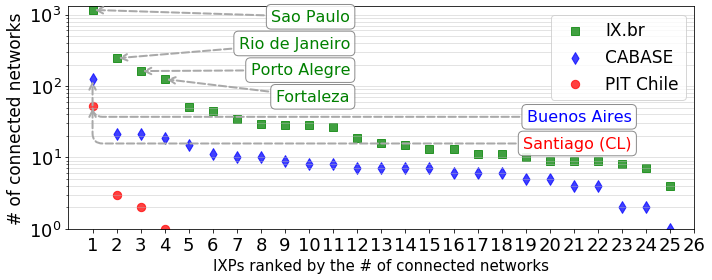

In [27]:
fig, ax1 = pl.subplots(1, figsize=(10, 4), sharex=True)
ax1.yaxis.grid(True, linestyle='-', color='#bababa',
               alpha=0.5, which='both')

ax1.scatter(
    np.arange(
        1,
        ixbr_member_df['as-cnt'].size + 1
    ),
    ixbr_member_df['as-cnt'].values,
    label='IX.br',
    c='green',
    marker='s',
    alpha=0.75,
    s=70,
)

ax1.scatter(
    np.arange(
        1,
        cabase_memeber_df['as-cnt'].size + 1
    ),
    cabase_memeber_df['as-cnt'].values,
    label='CABASE',
    c='blue',
    marker='d',
    alpha=0.75,
    s=70,
)

ax1.scatter(
    np.arange(
        1,
        pit_chile_member_df['as-cnt'].size + 1
    ),
    pit_chile_member_df['as-cnt'].values,
    label='PIT Chile',
    c='red',
    marker='o',
    alpha=0.75,
    s=70,
)

###############

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

v = [
    ('Sao Paulo', 1, ixbr_member_df['as-cnt'].values[0], (0.45, 0.92), 'green', bbox_props, True),
    ('Rio de Janeiro', 2, ixbr_member_df['as-cnt'].values[1], (0.45, 0.80), 'green', bbox_props, True),
    ('Porto Alegre', 3, ixbr_member_df['as-cnt'].values[2], (0.45, 0.68), 'green', bbox_props, True),
    ('Fortaleza', 4, ixbr_member_df['as-cnt'].values[3], (0.45, 0.56), 'green', bbox_props, True),
#     ('Curitiba', 5, ixbr_member_df['as-cnt'].values[4], (0.65, 0.54), 'green', bbox_props, False),
    ('Buenos Aires', 1, cabase_memeber_df['as-cnt'].values[0], (0.9, 0.47), 'blue', bbox_props, False),
    ('Santiago (CL)', 1, pit_chile_member_df['as-cnt'].values[0], (0.9, 0.35), 'red', bbox_props, False),
]

for u in v:
    plot_annotation(ax1, u[0], u[1], u[2], u[3], u[4], u[5], u[6])

ax1.set_xticks(
    np.arange(
        1,
        ixbr_member_df['as-cnt'].size + 1
    ), 
    minor=False
)
ax1.set_ylabel('# of connected networks', fontsize=17)
ax1.axis(
    [
        0,
        cabase_memeber_df.loc[
            cabase_memeber_df['as-cnt'] > 0
        ]['as-cnt'].size + 1,
        1,
        1300
    ]
)
ax1.set_xlabel('IXPs ranked by the # of connected networks', fontsize=15)
ax1.tick_params(labelsize=18)
ax1.set_yscale('log')
ax1.legend(loc='upper right', ncol=1, frameon=True, fontsize=17)
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig('../../figures/4_2_connected_networks.pdf')